In [40]:
import numpy as np
import scipy as sp
import pandas as pd
import sys
from tqdm import tqdm

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ParameterGrid

import matplotlib.pyplot as plt

sys.path.append('../..')
from nonlinear_significance.scripts.TreeTester import TreeTester

from simulations_util import *

## 1. Independent Gaussian linear

In [99]:
n = 100
d = 10
s = 5
rho_grid = np.arange(10) / 10
beta = 1
sigma = 0.1

results = []
for rho in rho_grid:
    Sigma = np.eye(d)
    for i in range(s):
        for j in range(i):
            Sigma[i, j] = rho
            Sigma[j, i] = rho
    X = np.random.multivariate_normal(np.zeros(d), Sigma, size=n)
    y = linear_model(X, sigma, s, beta)
    rf_model = RandomForestRegressor(max_features=0.5)
    rf_model.fit(X, y)
    results.append(rf_model.feature_importances_)
results = np.array(results)
FIs_df = pd.DataFrame(results)

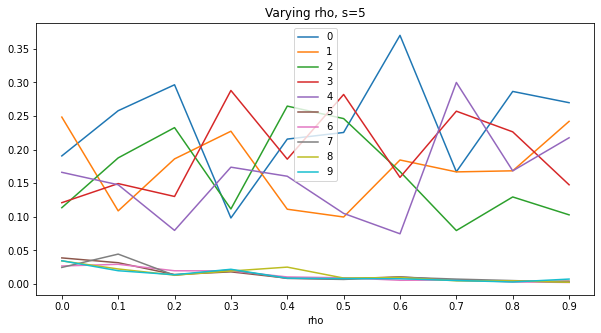

In [101]:
plt.figure(figsize=(10, 5))
plt.plot(FIs_df, label=np.arange(10))
plt.legend()
plt.xticks(ticks=np.arange(10), labels=rho_grid)
plt.xlabel("rho")
plt.title("Varying rho, s=5")
plt.show()

In [111]:
n = 100
d = 10
s = 1
rho_grid = np.arange(10) / 10
beta = 1
sigma = 0.1

results = []
for rho in rho_grid:
    Sigma = np.eye(d)
    for i in range(5):
        for j in range(i):
            Sigma[i, j] = rho
            Sigma[j, i] = rho
    X = np.random.multivariate_normal(np.zeros(d), Sigma, size=n)
    y = linear_model(X, sigma, s, beta)
    rf_model = RandomForestRegressor(max_features=0.33)
    rf_model.fit(X, y)
    results.append(rf_model.feature_importances_)
results = np.array(results)
FIs_df = pd.DataFrame(results)

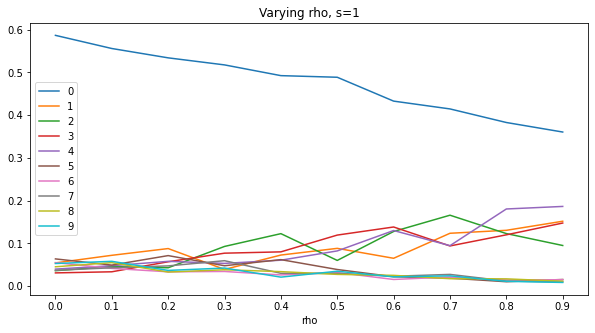

In [112]:
plt.figure(figsize=(10, 5))
plt.plot(FIs_df, label=np.arange(10))
plt.legend()
plt.xticks(ticks=np.arange(10), labels=rho_grid)
plt.xlabel("rho")
plt.title("Varying rho, s=1")
plt.show()

In [2]:
import statsmodels.api as sm

In [3]:
n = 100
d = 10
s = 5
beta = 1
sigma = 0.1

X = np.random.randn(n, d)
y = linear_model(X, sigma, s, beta)

In [28]:
p_values = np.zeros(d)
OLS_full = sm.OLS(y, X[:,0]).fit()
p_values[0] = OLS_full.f_pvalue
for i in range(1, d):
    OLS_restricted = OLS_full
    OLS_full = sm.OLS(y, X[:, np.arange(i+1)]).fit()
    p_values[i] = OLS_full.compare_f_test(OLS_restricted)[1]

In [29]:
p_values

array([2.83362355e-005, 7.70784130e-011, 1.65525952e-007, 1.04022809e-011,
       9.35501323e-106, 5.70863604e-002, 1.34621243e-001, 7.40149114e-001,
       5.33430368e-001, 4.63658548e-001])

In [17]:
results = sm.OLS(y, X[:,0]).fit()

In [13]:
np.arange(0)

array([], dtype=int64)

In [15]:
np.eye(10)[:,np.arange(0)].shape

(10, 0)